<a href="https://colab.research.google.com/github/sriram403/sriram403.gihub.io/blob/master/TestingCatchingup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-12-10 12:47:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  32.0MB/s    in 5.0s    

2021-12-10 12:47:26 (32.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile
zipfileRef = zipfile.ZipFile("10_food_classes_10_percent.zip")
zipfileRef.extractall()
zipfileRef.close()

In [ ]:
import os
for dirname,folders,dirnum in os.walk("10_food_classes_10_percent"):
  print(f"there are {len(dirnum)} images in this,.. and {len(folders)} and {dirname}")

there are 0 images in this,.. and 2 and 10_food_classes_10_percent
there are 0 images in this,.. and 10 and 10_food_classes_10_percent/test
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/ice_cream
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/sushi
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/ramen
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/grilled_salmon
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/chicken_curry
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/hamburger
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/pizza
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/chicken_wings
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/fried_rice
there are 250 images in this,.. and 0 and 10_food_classes_10_percent/test/steak
there are 0 images in 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import tensorflow as tf
import random
def Data_In_Image(dirname,class_name):
  chossen_dir = dirname+"/"+class_name
  random_image = random.sample(os.listdir(chossen_dir),1)
  img_data = mpim.imread(chossen_dir+"/"+random_image[0])
  plt.imshow(img_data)
  plt.title(class_name)
  plt.axis(False)

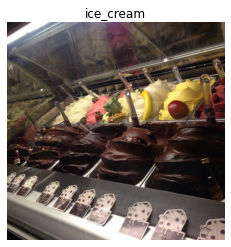

In [ ]:
Data_In_Image("10_food_classes_10_percent/test/","ice_cream")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_dir = "10_food_classes_10_percent/train/"
Test_dir = "10_food_classes_10_percent/test/"


Normalization = ImageDataGenerator(rescale=1/255)

Train_10_percent_data = Normalization.flow_from_directory(Train_dir,target_size=(224,224))
Test_data = Normalization.flow_from_directory(Test_dir,target_size=(224,224))

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
def create_tensorboard_callback(directory,name):
  import datetime
  chossen_dir = directory+"/"+name+"/"+datetime.datetime.now().strftime("%Y%M%D-%H%S%M")
  Tensorboard = tf.keras.callbacks.TensorBoard(log_dir=chossen_dir)
  print(f"your file is storing in {chossen_dir} now")
  return Tensorboard

In [ ]:
EfficientNetUrl="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
ResnetUrl="https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5"

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
def create_model_from_url(url,number_of_classes=10):
  model_from_url=hub.KerasLayer(url,trainable=False,input_shape=(224,224,3)) 
  model = tf.keras.Sequential([model_from_url,
                                      tf.keras.layers.Dense(number_of_classes,activation="softmax",)])
  return model

In [ ]:
EfficientNetModel=create_model_from_url(EfficientNetUrl)

In [ ]:
EfficientNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
def create_url_to_model(url,number_of_classes=10):
  mo = hub.KerasLayer(url,trainable=False,input_shape=(224,224,3))
  mod = tf.keras.Sequential([
                             mo,
                             tf.keras.layers.Dense(number_of_classes,activation="softmax")
  ])
  return mod

In [ ]:
ResnetModel=create_url_to_model(ResnetUrl)

In [ ]:
EfficientNetModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])
EfficientNetModelhist=EfficientNetModel.fit(Train_10_percent_data,
                                      epochs=5,
                                      steps_per_epoch=len(Train_10_percent_data),
                                      validation_data=Test_data,
                                      validation_steps=len(Test_data),
                                      callbacks=[create_tensorboard_callback("tensorboard","EfficientNetModel")])

your file is storing in tensorboard/EfficientNetModel/20210112/10/21-135001 now
Epoch 1/5
24/24 [==============================] - 46s 1s/step - loss: 1.8379 - accuracy: 0.4320 - val_loss: 1.2948 - val_accuracy: 0.7408
Epoch 2/5
24/24 [==============================] - 19s 803ms/step - loss: 1.0395 - accuracy: 0.7720 - val_loss: 0.8637 - val_accuracy: 0.8260
Epoch 3/5
24/24 [==============================] - 18s 791ms/step - loss: 0.7384 - accuracy: 0.8187 - val_loss: 0.6946 - val_accuracy: 0.8484
Epoch 4/5
24/24 [==============================] - 19s 804ms/step - loss: 0.5953 - accuracy: 0.8627 - val_loss: 0.6075 - val_accuracy: 0.8568
Epoch 5/5
24/24 [==============================] - 19s 800ms/step - loss: 0.5050 - accuracy: 0.8813 - val_loss: 0.5585 - val_accuracy: 0.8600


In [ ]:
!tensorboard dev upload --logdir ./tensorboard/\
 --name "efficientnetmodel"


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=5iJOktWh3soPfOG5QabE1P91d4oygp&prompt=consent&access_type=offlin

In [ ]:
def create_history(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(loss))

  plt.plot(epochs,loss,label="loss")
  plt.plot(val_loss,label="val_loss")
  plt.title("losscureve")
  plt.legend()

  plt.figure()
  plt.plot(accuracy,label="accuracy")
  plt.plot(val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.legend()

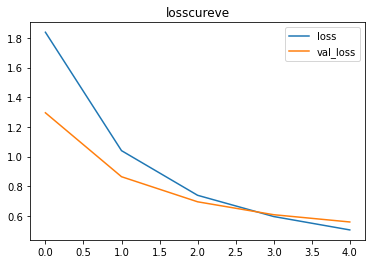

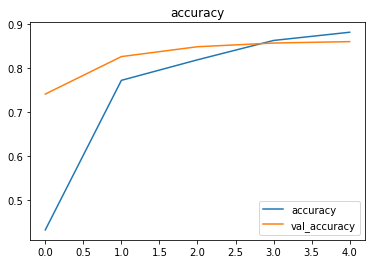

In [ ]:
create_history(EfficientNetModelhist)